In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput
import decimal

In [2]:
def range_decimal(start, stop, step, stop_inclusive=False):
    """ The Python range() function, using decimals.  A decimal loop_value generator.

    Note: The decimal math (addition) defines the rounding.

    If the stop is None, then:
        stop = start
        start = 0 (zero)

    If the step is 0 (zero) or None, then:
        if (stop < start) then step = -1 (minus one)
        if (stop >= start) then step = 1 (one)

    Example:
        for index in range_decimal(0, 1.0, '.1', stop_inclusive=True):
            print(index)

    :param start: The loop start value
    :param stop: The loop stop value
    :param step: The loop step value
    :param stop_inclusive: Include the stop value in the loop's yield generator: False = excluded ; True = included
    :return: The loop generator's yield increment value (decimal)
    """
    try:
        # Input argument(s) error check
        zero = decimal.Decimal('0')

        if start is None:
            start = zero

        if not isinstance(start, decimal.Decimal):
            start = decimal.Decimal(f'{start}')

        if stop is None:
            stop = start
            start = zero

        if not isinstance(stop, decimal.Decimal):
            stop = decimal.Decimal(f'{stop}')

        if step is None:
            step = decimal.Decimal('-1' if stop < start else '1')

        if not isinstance(step, decimal.Decimal):
            step = decimal.Decimal(f'{step}')

        if step == zero:
            step = decimal.Decimal('-1' if stop < start else '1')

        # Check for valid loop conditions
        if start == stop or (start < stop
                             and step < zero) or (start > stop
                                                  and step > zero):
            return  # Not valid: no loop

        # Case: increment step ( > 0 )
        if step > zero:
            while start < stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Case: decrement step ( < 0 )
        else:
            while start > stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Yield the stop value (inclusive)
        if stop_inclusive:
            yield stop

    except (ValueError, decimal.DecimalException) as ex:
        raise ValueError(f'{__name__}.range_decimal() error: {ex}')

In [3]:
def plot_max(max_fock, max_coherent, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(max_fock[:,0], max_fock[:,1], '-r', label='$Fock$')
    ax.plot(max_coherent[:,0], max_coherent[:,1], '-b', label='$Coherent$')
    
    ax.set_xlim(max_coherent[:,0][0],max_coherent[:,0][-1])
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_ylim(0)
    
    ax.set_title('Fock vs Coherent n=1: ' + title)
    ax.legend()
    
    return ax

In [4]:
source_dir = "../../outputs/gaussian/max/"

In [5]:
max_erg_fock = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_1/precision_0.001/ergotropy*.dat"))))
max_ene_fock = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_1/precision_0.001/energy*.dat"))))
max_pow_fock = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_1/precision_0.001/power*.dat"))))

In [6]:
max_erg_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/ergotropy*.dat"))))
max_ene_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/energy*.dat"))))
max_pow_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/power*.dat"))))

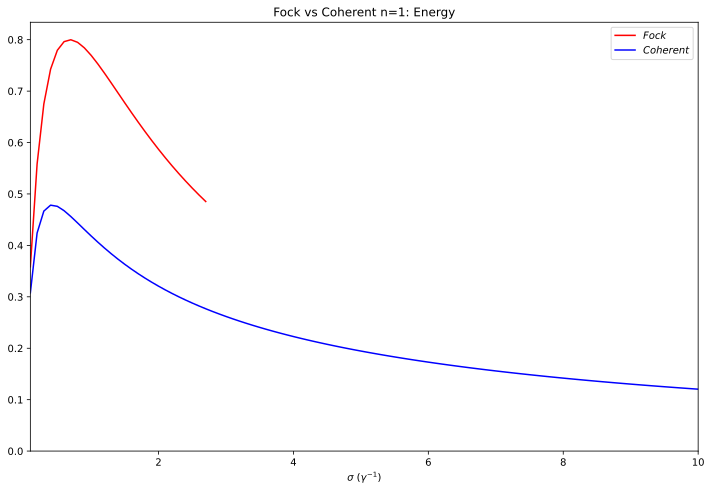

In [7]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(max_ene_fock, max_ene_coherent, title='Energy', ax=axes)

plt.tight_layout()
plt.show()

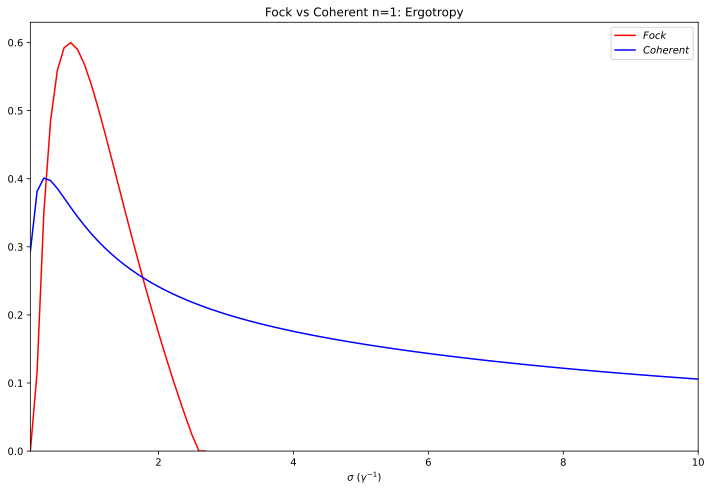

In [8]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(max_erg_fock, max_erg_coherent, title='Ergotropy', ax=axes)

plt.tight_layout()
plt.show()

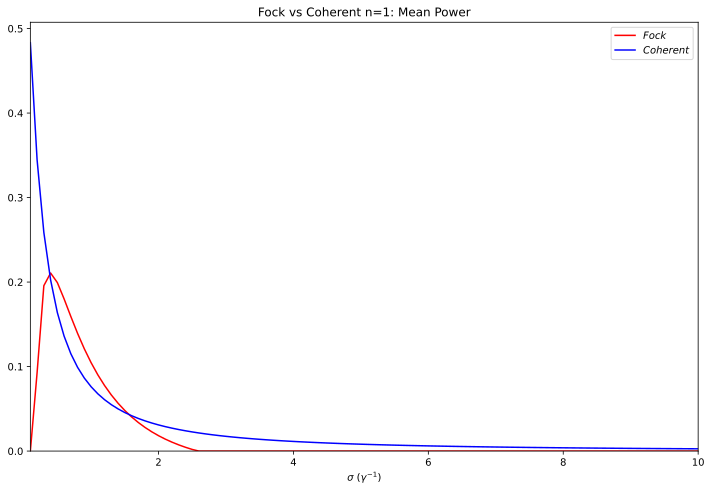

In [9]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(max_pow_fock, max_pow_coherent, title='Mean Power', ax=axes)

plt.tight_layout()
plt.show()

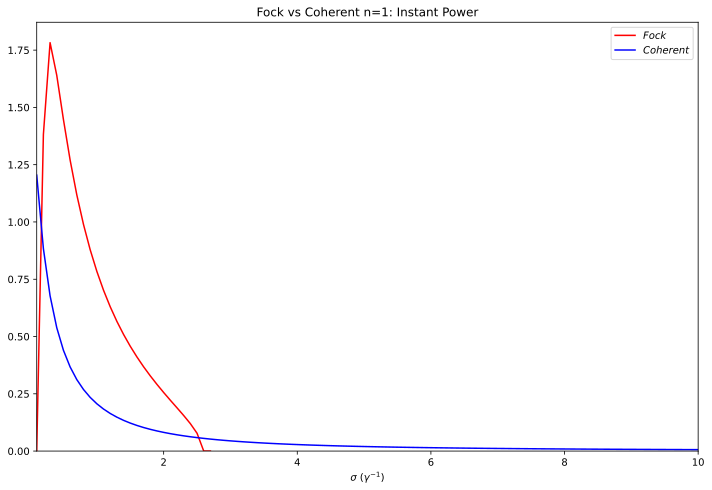

In [10]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

fig, ax = plt.subplots(1, figsize=(10,7))
#fig.set_figheight(7)
#fig.set_figwidth(10)
    
sig_l, instant_pow_fock, instant_pow_coherent = [], [], []
for sigma in range_decimal(0.1,2.7,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"fock_1/precision_0.001/sigma_"+str(sigma)+
                     "/ergotropy_"+str(sigma)+".dat")
    sig_l.append(float(sigma))
        
    # Calculate the numerical derivative
    # np.gradient uses the central slope, so it is more precise
    dt = erg[:,0][-1] - erg[:,0][-2]
    instant_pow_fock.append(np.gradient(erg[:,1], dt).max())
    
ax.plot(sig_l, instant_pow_fock, '-r', label='$Fock$')

sig_l = []
for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"coherent_1/precision_0.001/sigma_"+str(sigma)+
                     "/ergotropy_"+str(sigma)+".dat")
    sig_l.append(float(sigma))
    
    # Calculate the numerical derivative
    # np.gradient uses the central slope, so it is more precise
    dt = erg[:,0][-1] - erg[:,0][-2]
    instant_pow_coherent.append(np.gradient(erg[:,1], dt).max())
    
ax.plot(sig_l, instant_pow_coherent, '-b', label='$Coherent$')
ax.set_xlim(sig_l[0], sig_l[-1])
ax.set_ylim(0)
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
ax.set_title('Fock vs Coherent n=1: Instant Power')
ax.legend()

plt.tight_layout()
plt.show()

In [11]:
ind = np.argwhere(max_erg_fock == max_erg_fock[:,1].max())
sig_max_fock = max_erg_fock[ind[0,0]][0]
sig_max_fock

0.7

In [12]:
ind = np.argwhere(max_erg_coherent == max_erg_coherent[:,1].max())
sig_max_coherent = max_erg_coherent[ind[0,0]][0]
sig_max_coherent

0.3

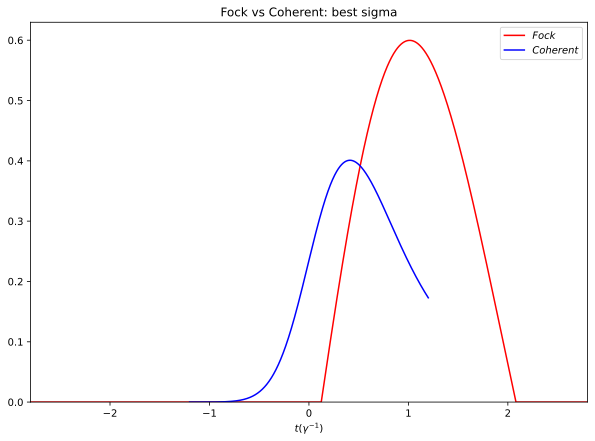

In [13]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

fig, ax = plt.subplots(1, figsize=(10,7))

best_erg_fock = np.loadtxt(source_dir+"fock_1/precision_0.001/sigma_"+str(sig_max_fock)
                           +"/ergotropy_"+str(sig_max_fock)+".dat")
best_erg_coherent = np.loadtxt(source_dir+"coherent_1/precision_0.001/sigma_"+str(sig_max_coherent)
                           +"/ergotropy_"+str(sig_max_coherent)+".dat")

ax.plot(best_erg_fock[:,0],best_erg_fock[:,1],'-r',label='$Fock$')
ax.plot(best_erg_coherent[:,0],best_erg_coherent[:,1],'-b',label='$Coherent$')

ax.set_xlim(best_erg_fock[:,0][0], best_erg_fock[:,0][-1])
ax.set_xlabel("$t(\gamma^{-1})$")
ax.set_ylim(0)

ax.legend()
ax.set_title("Fock vs Coherent: best sigma")

plt.show()

In [14]:
source_dir = "../../outputs/gaussian/max/"
max_erg_fock = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_2/precision_0.001/ergotropy*.dat"))))

source_dir = "../../outputs/gaussian/fixed_sigma/coherent_semiclassical/2/"

sig_list, max_erg_coherent = [], []
for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
    sig_list.append(float(sigma))
    erg = np.loadtxt(source_dir+"sigma_"+str(sigma)+"/precision_0.001/ergotropy.dat")
    max_erg_coherent.append(erg[:,1].max())

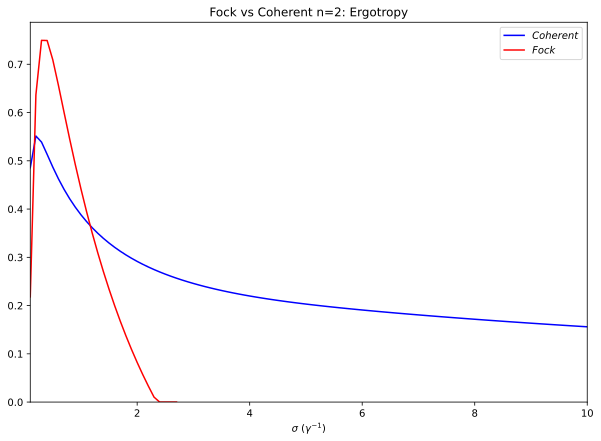

In [15]:
fig, ax = plt.subplots(1, figsize=(10,7))

ax.plot(sig_list, max_erg_coherent, '-b', label='$Coherent$')
ax.plot(max_erg_fock[:,0], max_erg_fock[:,1], '-r', label='$Fock$')

ax.set_xlim(sig_list[0], sig_list[-1])
ax.set_ylim(0)

ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
ax.set_title('Fock vs Coherent n=2: Ergotropy')
ax.legend()

plt.show()

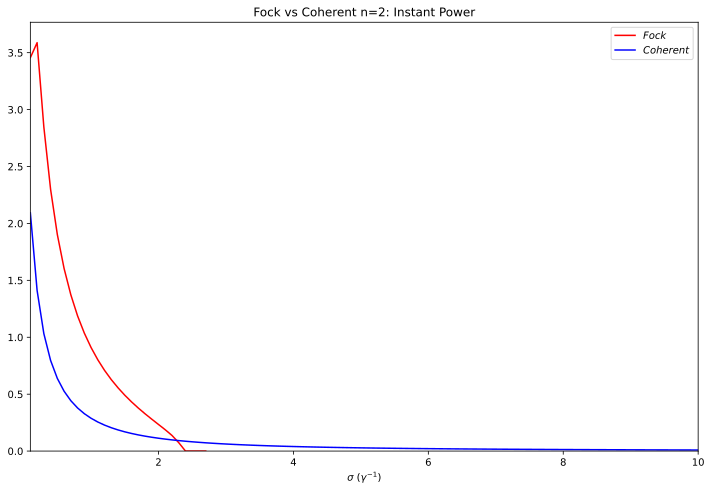

In [16]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

fig, ax = plt.subplots(1, figsize=(10,7))
#fig.set_figheight(7)
#fig.set_figwidth(10)
    
sig_l, instant_pow_fock, instant_pow_coherent = [], [], []
for sigma in range_decimal(0.1,2.7,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"fock_2/precision_0.001/sigma_"+str(sigma)+
                     "/ergotropy_"+str(sigma)+".dat")
    sig_l.append(float(sigma))
        
    # Calculate the numerical derivative
    # np.gradient uses the central slope, so it is more precise
    dt = erg[:,0][-1] - erg[:,0][-2]
    instant_pow_fock.append(np.gradient(erg[:,1], dt).max())
    
ax.plot(sig_l, instant_pow_fock, '-r', label='$Fock$')

sig_l = []
for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"coherent_semiclassical/2/sigma_"+str(sigma)+
                     "/precision_0.001/ergotropy.dat")
    sig_l.append(float(sigma))
    
    # Calculate the numerical derivative
    # np.gradient uses the central slope, so it is more precise
    dt = erg[:,0][-1] - erg[:,0][-2]
    instant_pow_coherent.append(np.gradient(erg[:,1], dt).max())
    
ax.plot(sig_l, instant_pow_coherent, '-b', label='$Coherent$')
ax.set_xlim(sig_l[0], sig_l[-1])
ax.set_ylim(0)
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
ax.set_title('Fock vs Coherent n=2: Instant Power')
ax.legend()

plt.tight_layout()
plt.show()

In [17]:
np.argwhere(max_erg_coherent == max(max_erg_coherent))

array([[1]])

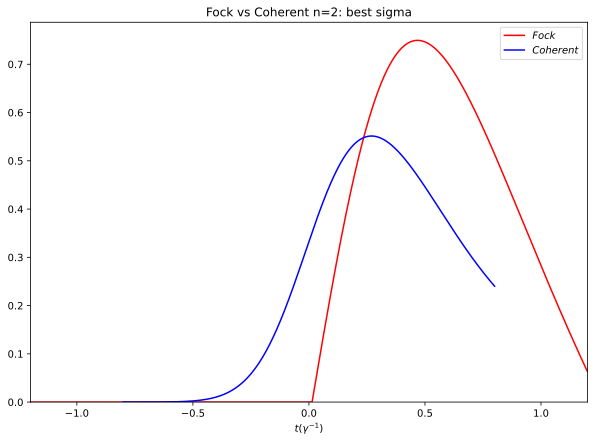

In [18]:
ind = np.argwhere(max_erg_fock == max_erg_fock[:,1].max())
sig_max_fock = max_erg_fock[ind[0,0]][0]

ind = np.argwhere(max_erg_coherent == max(max_erg_coherent))
sig_max_coherent = sig_list[ind[0,0]]

source_dir = "../../outputs/gaussian/fixed_sigma/"

fig, ax = plt.subplots(1, figsize=(10,7))

best_erg_fock = np.loadtxt(source_dir+"fock_2/precision_0.001/sigma_"+str(sig_max_fock)
                           +"/ergotropy_"+str(sig_max_fock)+".dat")
best_erg_coherent = np.loadtxt(source_dir+"coherent_semiclassical/2/sigma_"+str(sig_max_coherent)
                           +"/precision_0.001/ergotropy.dat")

ax.plot(best_erg_fock[:,0],best_erg_fock[:,1],'-r',label='$Fock$')
ax.plot(best_erg_coherent[:,0],best_erg_coherent[:,1],'-b',label='$Coherent$')

ax.set_xlim(best_erg_fock[:,0][0], best_erg_fock[:,0][-1])
ax.set_xlabel("$t(\gamma^{-1})$")
ax.set_ylim(0)

ax.legend()
ax.set_title("Fock vs Coherent n=2: best sigma")

plt.show()

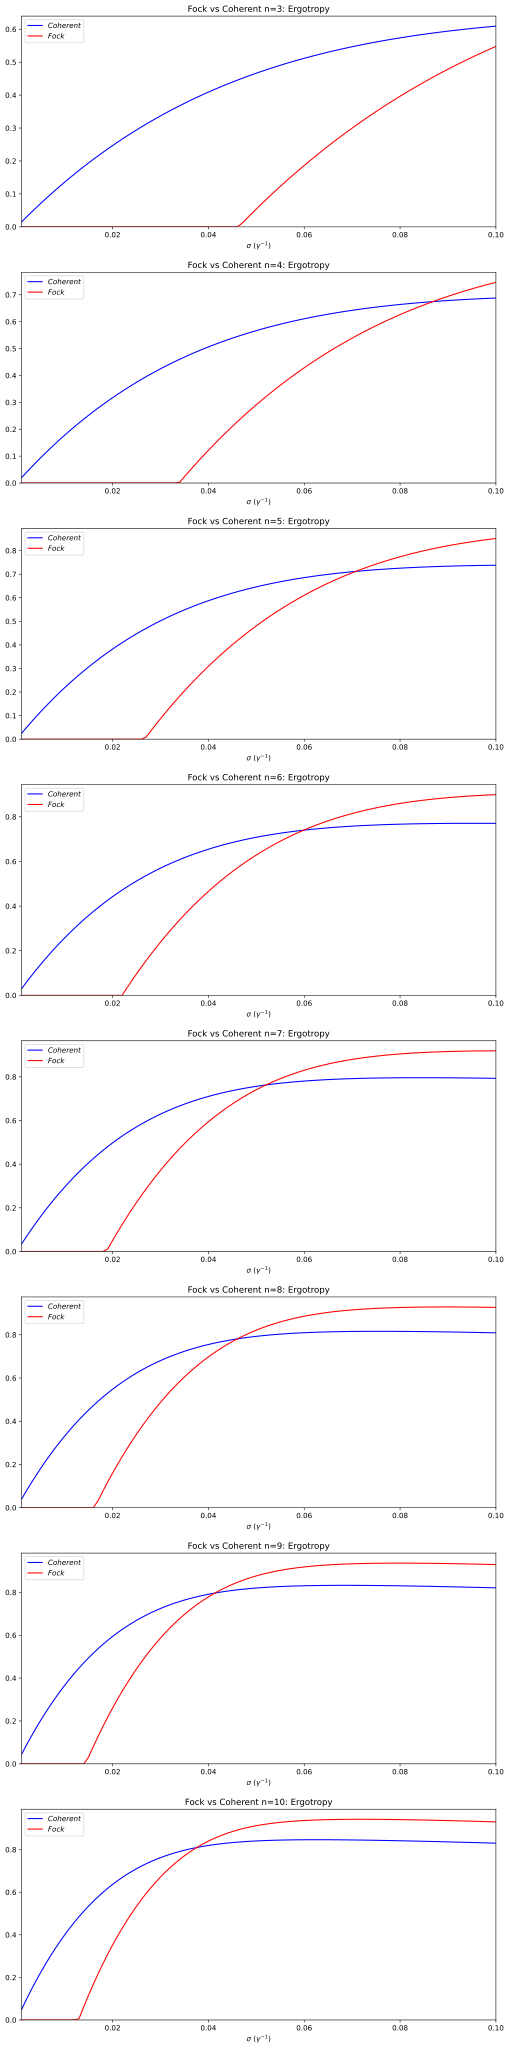

In [19]:
fig, axes = plt.subplots(len(range(3,11)), figsize=(10,40))

for i, ax in zip(range(3,11,1), axes):
    source_dir = "../../outputs/gaussian/max/"
    max_erg_fock = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_"+str(i)+
                                                               "/precision_0.0005/ergotropy*.dat"))))

    source_dir = "../../outputs/gaussian/fixed_sigma/coherent_semiclassical/"+str(i)+"/"

    sig_list, max_erg_coherent = [], []
    for sigma in range_decimal(0.001,0.1,0.001,stop_inclusive=True):
        sig_list.append(float(sigma))
        erg = np.loadtxt(source_dir+"sigma_"+str(sigma)+"/precision_0.0005/ergotropy.dat")
        max_erg_coherent.append(erg[:,1].max())

    ax.plot(sig_list, max_erg_coherent, '-b', label='$Coherent$')
    ax.plot(max_erg_fock[:,0], max_erg_fock[:,1], '-r', label='$Fock$')

    ax.set_xlim(sig_list[0], sig_list[-1])
    ax.set_ylim(0)

    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_title("Fock vs Coherent n=" + str(i) + ": Ergotropy")
    ax.legend()

plt.tight_layout()
plt.show()

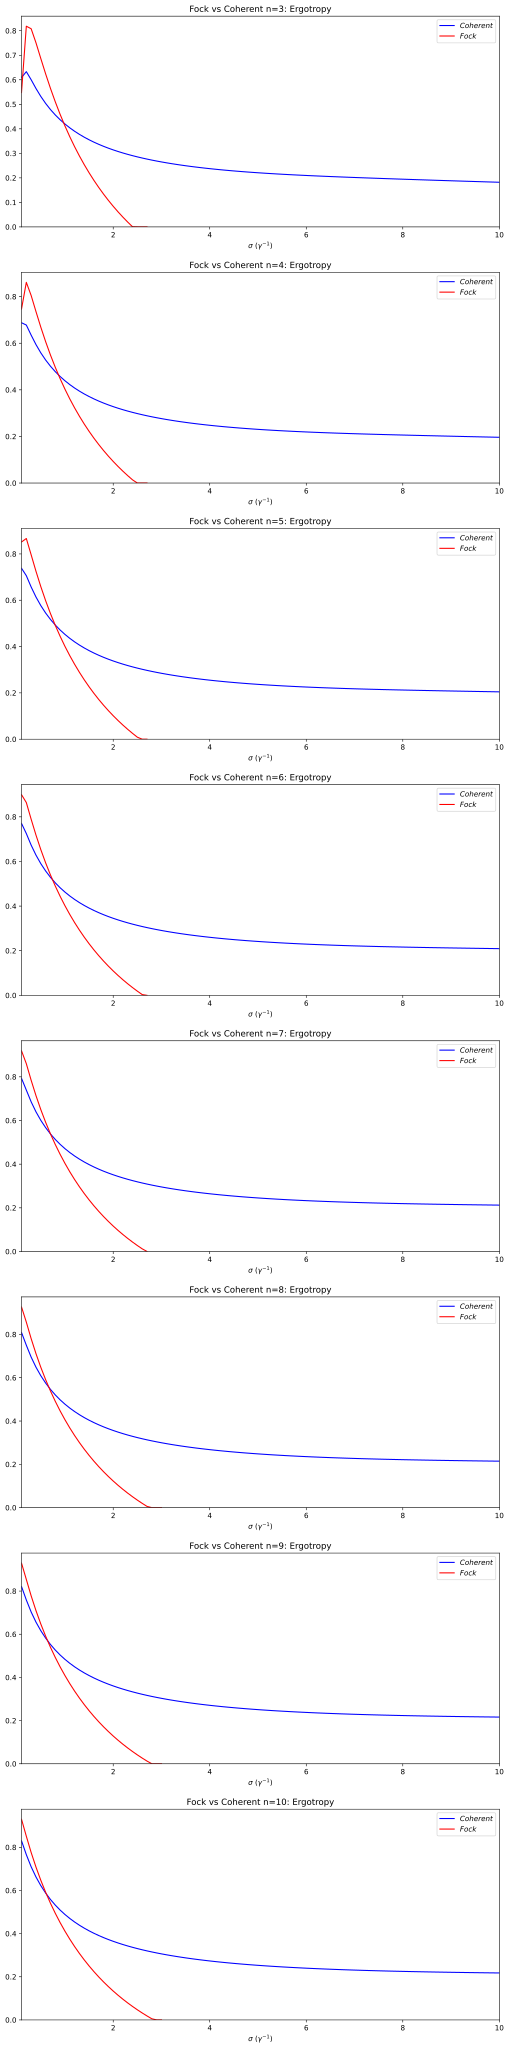

In [20]:
fig, axes = plt.subplots(len(range(3,11)), figsize=(10,40))

for i, ax in zip(range(3,11,1), axes):
    source_dir = "../../outputs/gaussian/max/"
    max_erg_fock = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_"+str(i)+
                                                               "/precision_0.001/ergotropy*.dat"))))

    source_dir = "../../outputs/gaussian/fixed_sigma/coherent_semiclassical/"+str(i)+"/"

    sig_list, max_erg_coherent = [], []
    for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
        sig_list.append(float(sigma))
        erg = np.loadtxt(source_dir+"sigma_"+str(sigma)+"/precision_0.001/ergotropy.dat")
        max_erg_coherent.append(erg[:,1].max())

    ax.plot(sig_list, max_erg_coherent, '-b', label='$Coherent$')
    ax.plot(max_erg_fock[:,0], max_erg_fock[:,1], '-r', label='$Fock$')

    ax.set_xlim(sig_list[0], sig_list[-1])
    ax.set_ylim(0)

    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_title("Fock vs Coherent n=" + str(i) + ": Ergotropy")
    ax.legend()

plt.tight_layout()
plt.show()

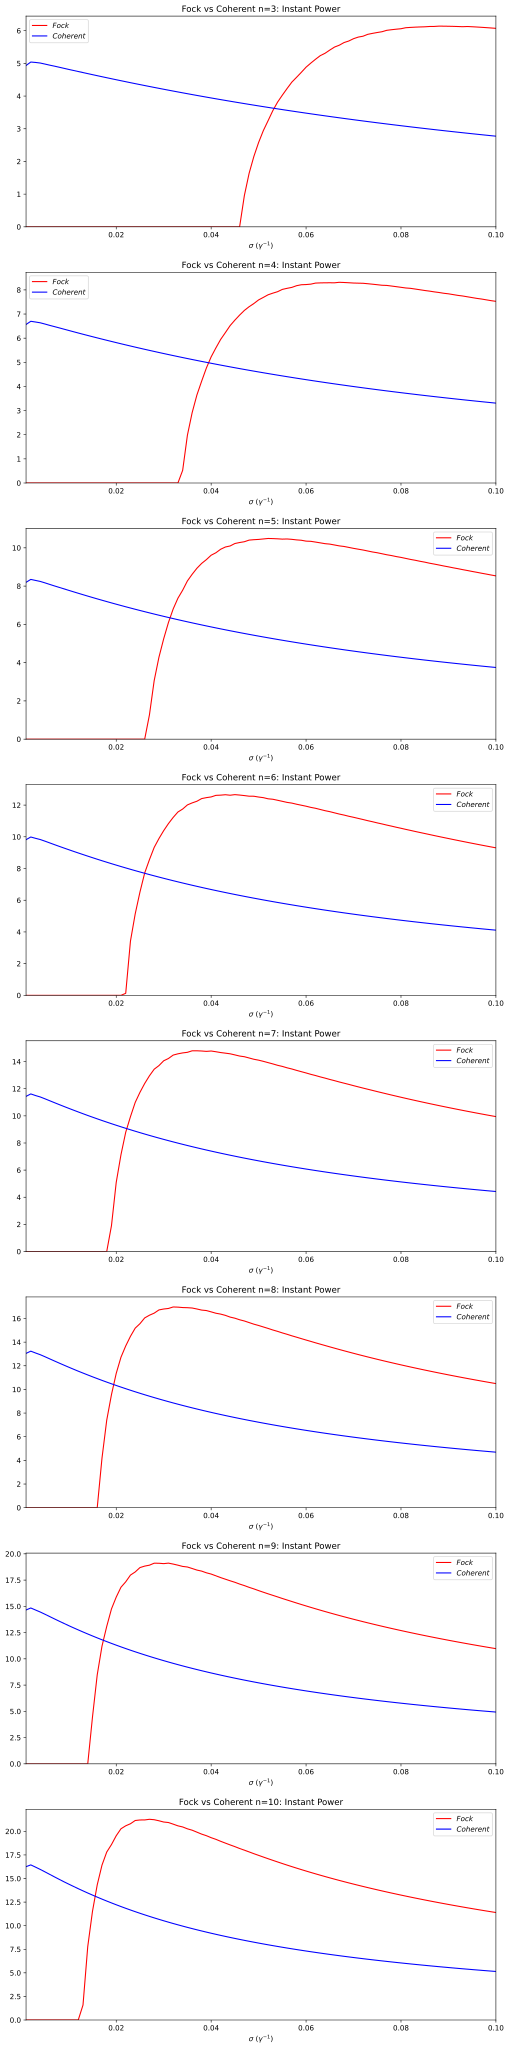

In [21]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

fig, axes = plt.subplots(len(range(3,11)), figsize=(10,40))

for i, ax in zip(range(3,11,1), axes):
    sig_l, instant_pow_fock, instant_pow_coherent = [], [], []
    for sigma in range_decimal(0.001,0.1,0.001,stop_inclusive=True):
        erg = np.loadtxt(source_dir+"fock_"+str(i)+"/precision_0.0005/sigma_"+str(sigma)+
                         "/ergotropy_"+str(sigma)+".dat")
        sig_l.append(float(sigma))
        
        # Calculate the numerical derivative
        # np.gradient uses the central slope, so it is more precise
        dt = erg[:,0][-1] - erg[:,0][-2]
        instant_pow_fock.append(np.gradient(erg[:,1], dt).max())
    
    ax.plot(sig_l, instant_pow_fock, '-r', label='$Fock$')

    sig_l = []
    for sigma in range_decimal(0.001,0.1,0.001,stop_inclusive=True):
        erg = np.loadtxt(source_dir+"coherent_semiclassical/"+str(i)+"/sigma_"+str(sigma)+
                     "/precision_0.0005/ergotropy.dat")
        sig_l.append(float(sigma))
    
        # Calculate the numerical derivative
        # np.gradient uses the central slope, so it is more precise
        dt = erg[:,0][-1] - erg[:,0][-2]
        instant_pow_coherent.append(np.gradient(erg[:,1], dt).max())
    
    ax.plot(sig_l, instant_pow_coherent, '-b', label='$Coherent$')
    ax.set_xlim(sig_l[0], sig_l[-1])
    ax.set_ylim(0)
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_title("Fock vs Coherent n="+str(i)+": Instant Power")
    ax.legend()

plt.tight_layout()
plt.show()

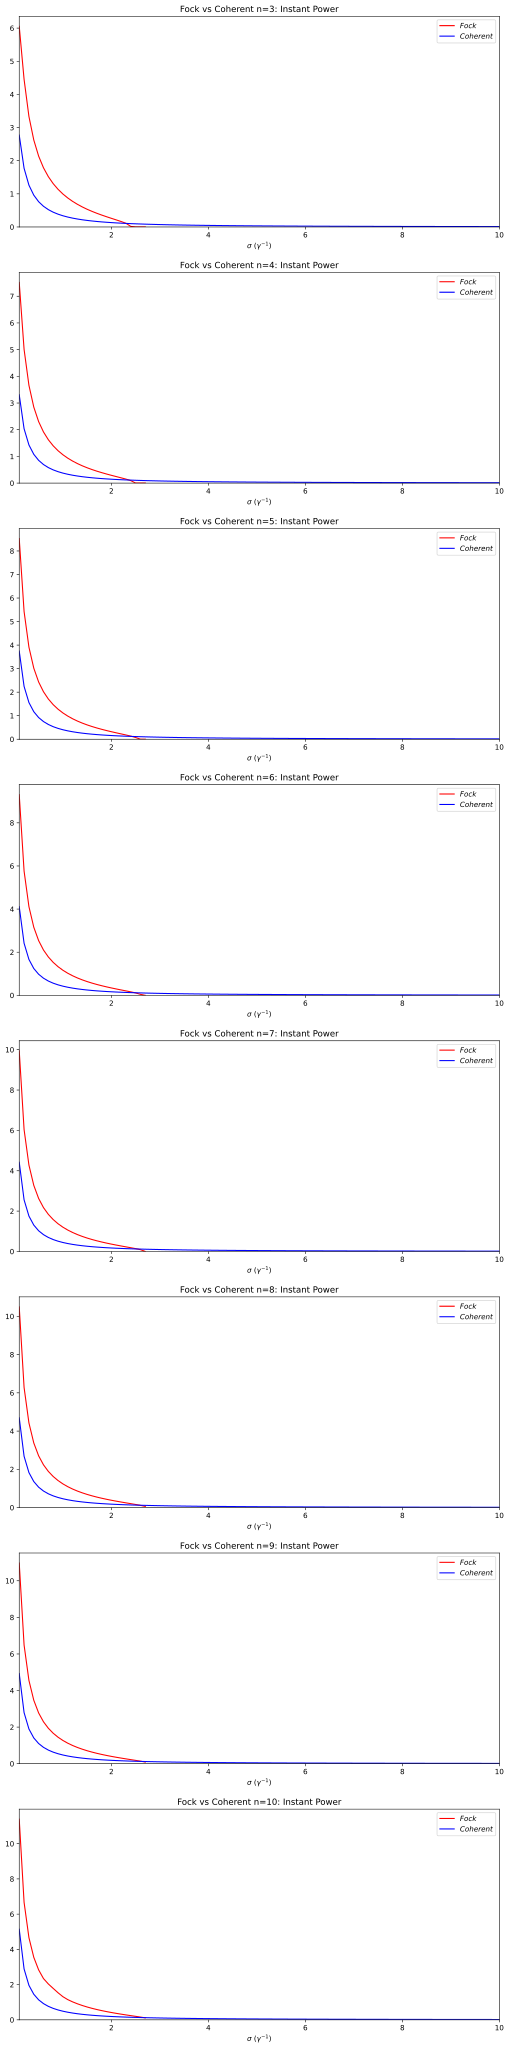

In [22]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

fig, axes = plt.subplots(len(range(3,11)), figsize=(10,40))

for i, ax in zip(range(3,11,1), axes):
    sig_l, instant_pow_fock, instant_pow_coherent = [], [], []
    for sigma in range_decimal(0.1,2.7,0.1,stop_inclusive=True):
        erg = np.loadtxt(source_dir+"fock_"+str(i)+"/precision_0.001/sigma_"+str(sigma)+
                         "/ergotropy_"+str(sigma)+".dat")
        sig_l.append(float(sigma))
        
        # Calculate the numerical derivative
        # np.gradient uses the central slope, so it is more precise
        dt = erg[:,0][-1] - erg[:,0][-2]
        instant_pow_fock.append(np.gradient(erg[:,1], dt).max())
    
    ax.plot(sig_l, instant_pow_fock, '-r', label='$Fock$')

    sig_l = []
    for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
        erg = np.loadtxt(source_dir+"coherent_semiclassical/"+str(i)+"/sigma_"+str(sigma)+
                     "/precision_0.001/ergotropy.dat")
        sig_l.append(float(sigma))
    
        # Calculate the numerical derivative
        # np.gradient uses the central slope, so it is more precise
        dt = erg[:,0][-1] - erg[:,0][-2]
        instant_pow_coherent.append(np.gradient(erg[:,1], dt).max())
    
    ax.plot(sig_l, instant_pow_coherent, '-b', label='$Coherent$')
    ax.set_xlim(sig_l[0], sig_l[-1])
    ax.set_ylim(0)
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_title("Fock vs Coherent n="+str(i)+": Instant Power")
    ax.legend()

plt.tight_layout()
plt.show()

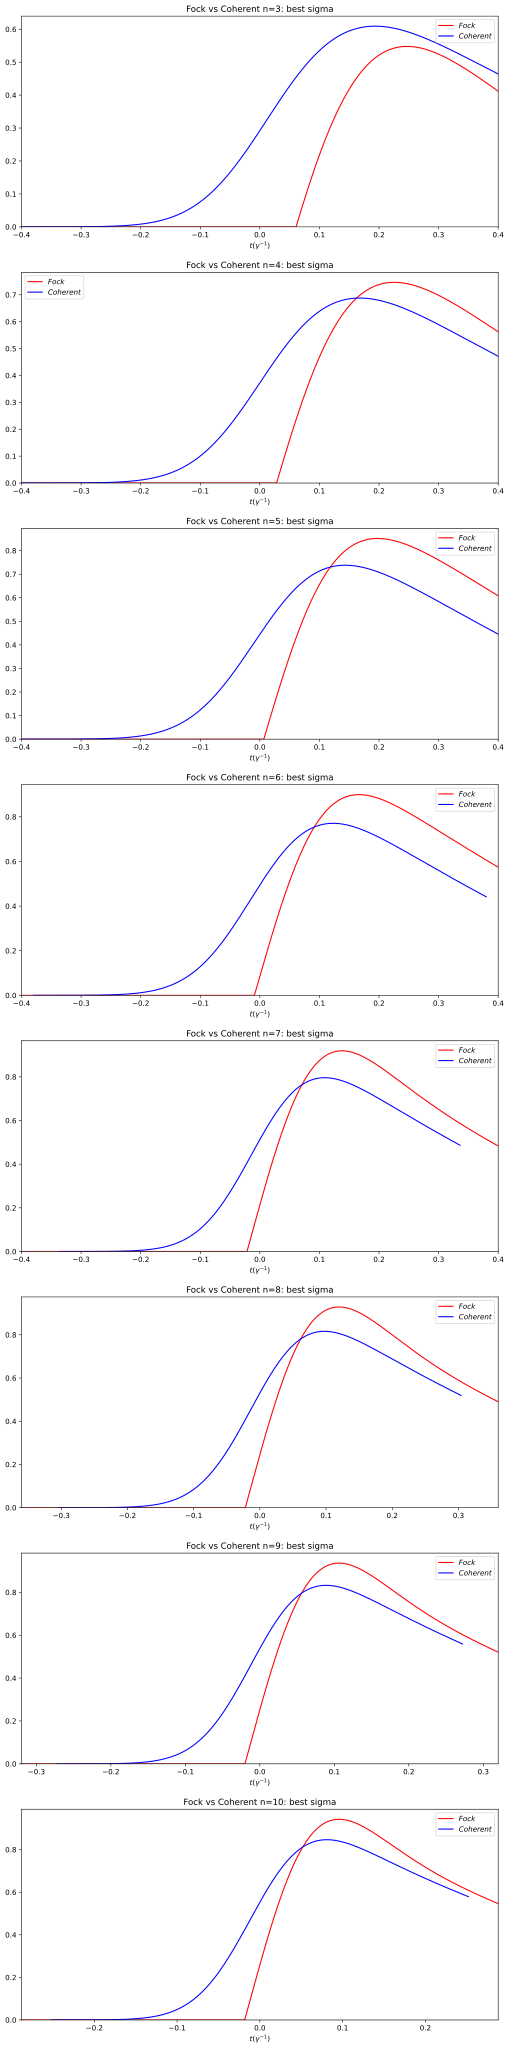

In [23]:
fig, axes = plt.subplots(len(range(3,11)), figsize=(10,40))

for i, ax in zip(range(3,11,1), axes):
    source_dir = "../../outputs/gaussian/max/"
    max_erg_fock = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_"+str(i)+
                                                               "/precision_0.0005/ergotropy*.dat"))))

    source_dir = "../../outputs/gaussian/fixed_sigma/coherent_semiclassical/"+str(i)+"/"

    sig_list, max_erg_coherent = [], []
    for sigma in range_decimal(0.001,0.1,0.001,stop_inclusive=True):
        sig_list.append(float(sigma))
        erg = np.loadtxt(source_dir+"sigma_"+str(sigma)+"/precision_0.0005/ergotropy.dat")
        max_erg_coherent.append(erg[:,1].max())
        
    ind = np.argwhere(max_erg_fock == max_erg_fock[:,1].max())
    sig_max_fock = max_erg_fock[ind[0,0]][0]

    ind = np.argwhere(max_erg_coherent == max(max_erg_coherent))
    sig_max_coherent = sig_list[ind[0,0]]

    source_dir = "../../outputs/gaussian/fixed_sigma/"

    best_erg_fock = np.loadtxt(source_dir+"fock_"+str(i)+"/precision_0.0005/sigma_"+str(sig_max_fock)
                               +"/ergotropy_"+str(sig_max_fock)+".dat")
    best_erg_coherent = np.loadtxt(source_dir+"coherent_semiclassical/"+str(i)+"/sigma_"+str(sig_max_coherent)
                               +"/precision_0.0005/ergotropy.dat")

    ax.plot(best_erg_fock[:,0],best_erg_fock[:,1],'-r',label='$Fock$')
    ax.plot(best_erg_coherent[:,0],best_erg_coherent[:,1],'-b',label='$Coherent$')

    ax.set_xlim(best_erg_fock[:,0][0], best_erg_fock[:,0][-1])
    ax.set_xlabel("$t(\gamma^{-1})$")
    ax.set_ylim(0)

    ax.legend()
    ax.set_title("Fock vs Coherent n="+str(i)+": best sigma")

plt.tight_layout()
plt.show()

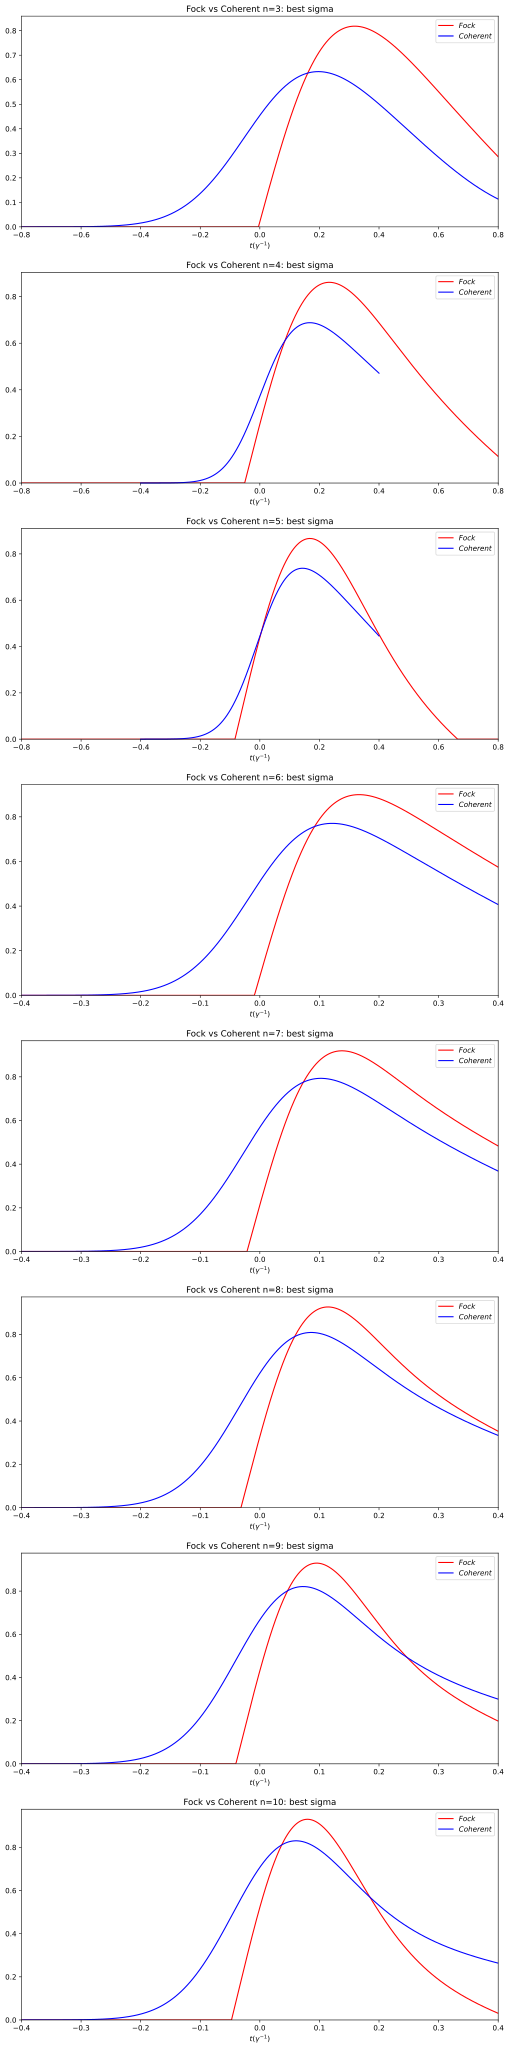

In [24]:
fig, axes = plt.subplots(len(range(3,11)), figsize=(10,40))

for i, ax in zip(range(3,11,1), axes):
    source_dir = "../../outputs/gaussian/max/"
    max_erg_fock = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_"+str(i)+
                                                               "/precision_0.001/ergotropy*.dat"))))

    source_dir = "../../outputs/gaussian/fixed_sigma/coherent_semiclassical/"+str(i)+"/"

    sig_list, max_erg_coherent = [], []
    for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
        sig_list.append(float(sigma))
        erg = np.loadtxt(source_dir+"sigma_"+str(sigma)+"/precision_0.001/ergotropy.dat")
        max_erg_coherent.append(erg[:,1].max())
        
    ind = np.argwhere(max_erg_fock == max_erg_fock[:,1].max())
    sig_max_fock = max_erg_fock[ind[0,0]][0]

    ind = np.argwhere(max_erg_coherent == max(max_erg_coherent))
    sig_max_coherent = sig_list[ind[0,0]]

    source_dir = "../../outputs/gaussian/fixed_sigma/"

    best_erg_fock = np.loadtxt(source_dir+"fock_"+str(i)+"/precision_0.001/sigma_"+str(sig_max_fock)
                               +"/ergotropy_"+str(sig_max_fock)+".dat")
    best_erg_coherent = np.loadtxt(source_dir+"coherent_semiclassical/"+str(i)+"/sigma_"+str(sig_max_coherent)
                               +"/precision_0.001/ergotropy.dat")

    ax.plot(best_erg_fock[:,0],best_erg_fock[:,1],'-r',label='$Fock$')
    ax.plot(best_erg_coherent[:,0],best_erg_coherent[:,1],'-b',label='$Coherent$')

    ax.set_xlim(best_erg_fock[:,0][0], best_erg_fock[:,0][-1])
    ax.set_xlabel("$t(\gamma^{-1})$")
    ax.set_ylim(0)

    ax.legend()
    ax.set_title("Fock vs Coherent n="+str(i)+": best sigma")

plt.tight_layout()
plt.show()

In [26]:
source_dir = "../../outputs/gaussian/max/"

max_erg_fock, max_ene_fock = [], []
for i in range(1,11,1):
    max_erg_file, max_ene_file= [], []
    for file in sorted(glob.glob(source_dir + "fock_" + str(i) + "/precision_*")):
        max_erg_file.append(np.loadtxt(fileinput.input(sorted(glob.glob(file+"/ergotropy*.dat"))))[:,1].max())
        max_ene_file.append(np.loadtxt(fileinput.input(sorted(glob.glob(file+"/energy*.dat"))))[:,1].max())
    max_erg_fock.append(max(max_erg_file))
    max_ene_fock.append(max(max_ene_file))
    
source_dir = "../../outputs/gaussian/fixed_sigma/coherent_semiclassical/"

n_ph = list(range(1,11))+[20,50,100,500]
max_erg_coherent, max_ene_coherent = [], []
for i in n_ph:
    max_erg_file, max_ene_file = [], []
    for file in sorted(glob.glob(source_dir + str(i) + "/sigma_*/precision_*/")):
        erg = np.loadtxt(file+"/ergotropy.dat")
        ene = np.loadtxt(file+"/energy.dat")
        max_erg_file.append(erg[:,1].max())
        max_ene_file.append(ene[:,1].max())
    max_erg_coherent.append(max(max_erg_file))
    max_ene_coherent.append(max(max_ene_file))

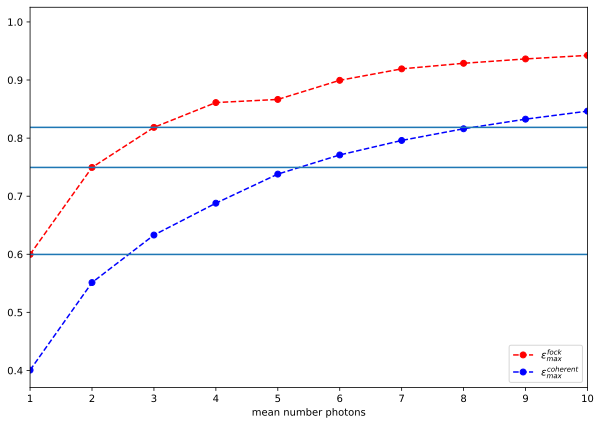

In [51]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(list(range(1,11)), max_erg_fock, 'o--r', label='$\epsilon_{max}^{fock}$')
ax.plot(n_ph, max_erg_coherent, 'o--b', label='$\epsilon_{max}^{coherent}$')

for eps in max_erg_fock[0:3]:
    ax.hlines(eps, 1, 50, linestyles='solid')

ax.set_xlim(1,10)
ax.set_xlabel('mean number photons')

ax.legend(loc='lower right')
plt.show()

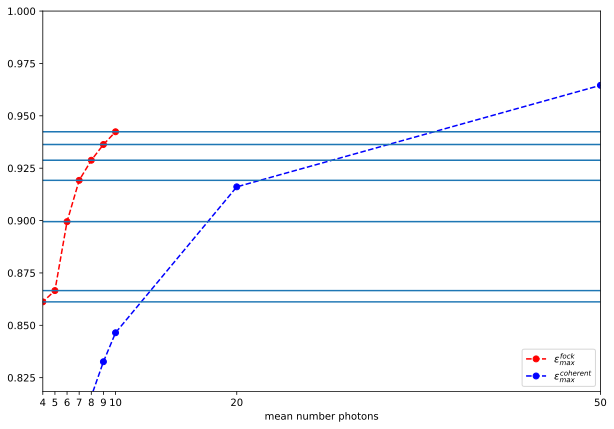

In [53]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(list(range(1,11)), max_erg_fock, 'o--r', label='$\epsilon_{max}^{fock}$')
ax.plot(n_ph, max_erg_coherent, 'o--b', label='$\epsilon_{max}^{coherent}$')

for eps in max_erg_fock[3:]:
    ax.hlines(eps, 1, 50, linestyles='solid')

ax.set_xlim(4,50)
ax.set_xticks(list(range(4,11)) + [20,50])
ax.set_xlabel('mean number photons')
ax.set_ylim(max_erg_fock[2],1)

ax.legend(loc='lower right')
plt.show()

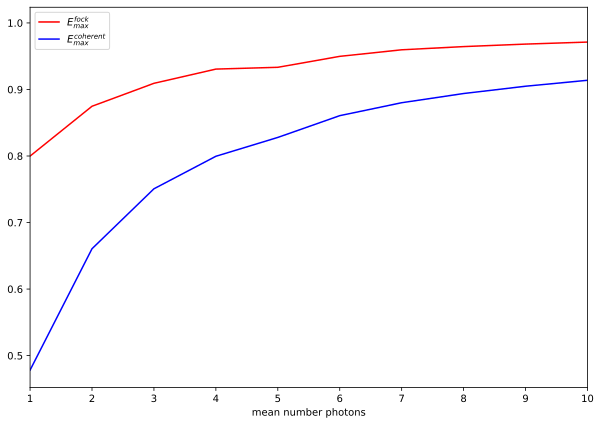

In [30]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(list(range(1,11)), max_ene_fock, '-r', label='$E_{max}^{fock}$')
ax.plot(n_ph, max_ene_coherent, '-b', label='$E_{max}^{coherent}$')

ax.set_xlim(1,10)
ax.set_xlabel('mean number photons')

ax.legend()
plt.show()